# Trabajo Practico Nro. 1

## Simulaciones

### Ejercicio 1 - Consigna
- Genere un paquete/modulo o archivo que permita sintetizar las señales descriptas en la imagen. Se espera un link a un pdf con el código y algunas capturas que validen su funcionamiento.

### Ejercicio 1 - Resolución

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from enum import Enum, auto
from copy import deepcopy as cpy
from dataclasses import dataclass

@dataclass
class PsfWaveformSpec:
  fo_hz: float
  fs_hz: float
  samples_n: int
  ph_rad: float = 0
  amp: float = 1


# Generador de Formas de Onda.
def psf_sine(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * np.sin((2 * np.pi * spec.fo_hz * n / spec.fs_hz) + spec.ph_rad)
  return (sn + amp) / 2

def psf_square(spec: PsfWaveformSpec):
  return psf_sine(spec) >= (spec.amp / 2)
  
def psf_tri(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * signal.sawtooth(2 * np.pi * spec.fo_hz * n / spec.fs_hz + + spec.ph_rad, .5) 
  return (sn + amp) / 2


# Utilidades.
def psf_spec_to_time_sec(spec: PsfWaveformSpec):
  return np.arange(spec.samples_n) * 1/spec.fs_hz

def psf_gen_cont_and_disc_wvfm(spec: PsfWaveformSpec, fun=psf_sine):
  spec_cont = cpy(spec)
  spec_cont.fs_hz = spec_cont.fs_hz * 100
  spec_cont.samples_n = spec_cont.samples_n * 100
  return (psf_spec_to_time_sec(spec), fun(spec)), (psf_spec_to_time_sec(spec_cont), fun(spec_cont))  


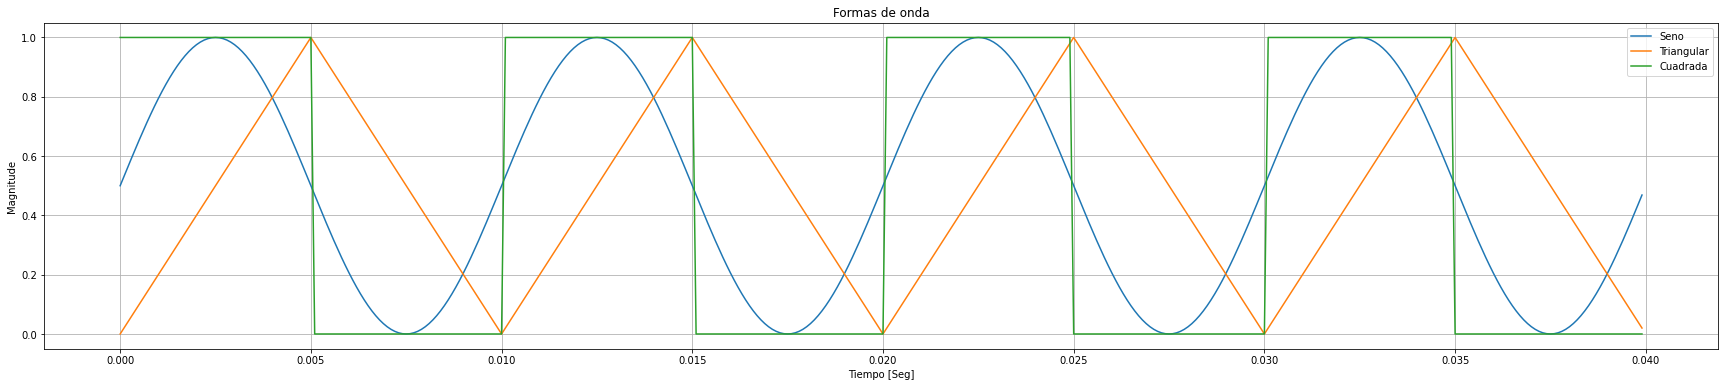

In [21]:
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 10000,
    samples_n = 400,
    ph_rad = 0,
    amp = 1
)

sine = psf_sine(psf_waveform_spec_discrete)
triangular = psf_tri(psf_waveform_spec_discrete)
square = psf_square(psf_waveform_spec_discrete)
time = psf_spec_to_time_sec(psf_waveform_spec_discrete)


plt.figure(figsize=(30, 6))
plt.title('Formas de onda')
plt.plot(time, sine, label='Seno')
plt.plot(time, triangular, label='Triangular')
plt.plot(time, square, label='Cuadrada')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Magnitude')
plt.show()

### Ejercicio 2 - Consigna
-  Utilizando la funcion senoidal confeccionada en el enunciado anterior, siga los pasos indicados en la imagen y suba un pdf con los resultados. NOTA: cuando dice en 2.1 por ej f0=0.1 * fs, lo que pide es que la frecuencia de la señal de entrada sea un 10% del valor de la frecuencia de sampleo. Si elijen fs=100 entonces f0=10 y f0=110. Cuando grafiquen estas dos señales se pide que indique como haría para diferenciarlas (si fuera posible). Lo mismo para el 2.2, con el detalle que ademas se pide evaluar la fase entre los dos casos del experimento. Es decir las respuestas a 2.1 y 2.2 aunque podrían argumentarlas teóricamente, se invita a que grafiquen los casos y estos revelen la situación para que puedan responder en base a estos.

### Ejercicio 2.1 - Resolución

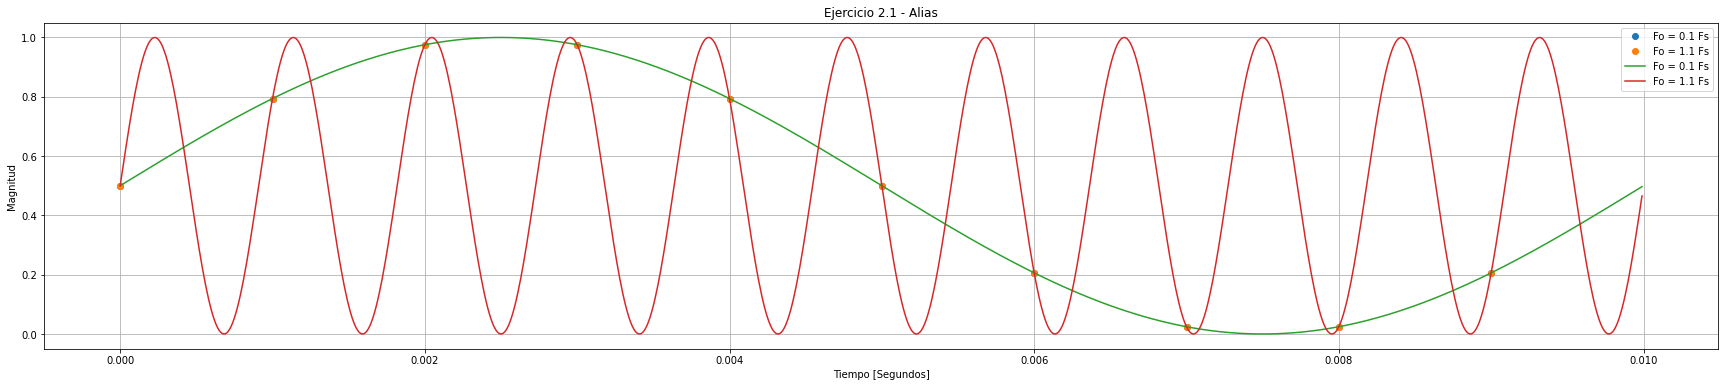

In [20]:
# Ex. 2.1
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 10,
    ph_rad = 0,
    amp = 1
)

spec_2_1_a = cpy(psf_waveform_spec_discrete)
spec_2_1_a.fo_hz = spec_2_1_a.fs_hz * 0.1

spec_2_1_b = cpy(psf_waveform_spec_discrete)
spec_2_1_b.fo_hz = spec_2_1_a.fs_hz * 1.1

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_1_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_1_b)

plt.figure(figsize=(30, 6))
plt.title('Ejercicio 2.1 - Alias')
plt.plot(t1d, f1d, 'o', label='Fo = 0.1 Fs')
plt.plot(t2d, f2d, 'o', label='Fo = 1.1 Fs')
plt.plot(t1c, f1c, label='Fo = 0.1 Fs')
plt.plot(t2c, f2c, label='Fo = 1.1 Fs')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Segundos]')
plt.ylabel('Magnitud')
plt.show()

### Ejercicio 2.1 - Comentarios
Se observa que para ambas funciones la muestras obtenidas son exactamente las mismas. 
Este fenómeno de repetición es propio de muestrear señales que superan frecuencia de sampleo de Shannon-Nyquist. 

En cuanto a si las señales pueden diferenciarse, la respuesta es que no: la información que ingresa al sistema al muestrear cualquiera de estas dos señales es exactamente la misma, por lo cual, son indistinguibles. 

La _solución_ correcta en este caso sería no permitir el ingreso al sistema de señales que superen `fs/2`. De esta manera, se puede garantizar una reconstrucción/interpretación _fiel_ de la señal entrante.

### Ejercicio 2.2 - Resolución

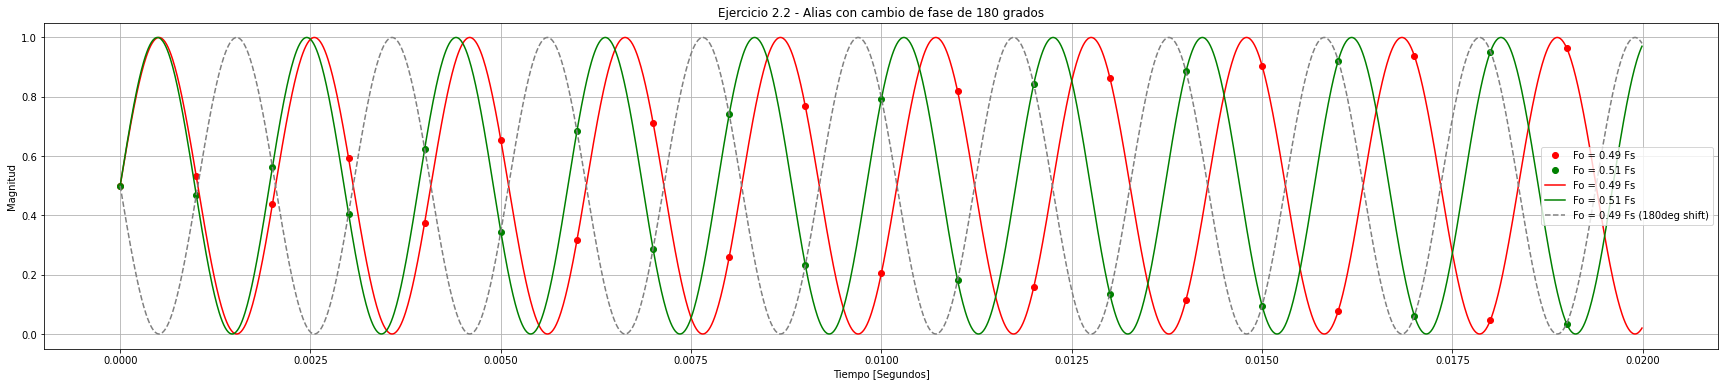

In [19]:
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 20,
    ph_rad = 0,
    amp = 1
)


spec_2_2_a = cpy(psf_waveform_spec_discrete)
spec_2_2_a.fo_hz = spec_2_1_a.fs_hz * 0.49

spec_2_2_b = cpy(psf_waveform_spec_discrete)
spec_2_2_b.fo_hz = spec_2_1_a.fs_hz * 0.51

spec_2_2_c = cpy(psf_waveform_spec_discrete)
spec_2_2_c.ph_rad = np.pi
spec_2_2_c.fo_hz = spec_2_1_a.fs_hz * 0.49

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_2_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_2_b)
(t3d, f3d), (t3c, f3c) = psf_gen_cont_and_disc_wvfm(spec_2_2_c)

plt.figure(figsize=(30, 6))
plt.title('Ejercicio 2.2 - Alias con cambio de fase de 180 grados')
plt.plot(t1d, f1d, 'o', color='r', label='Fo = 0.49 Fs')
plt.plot(t2d, f2d, 'o', color='g',label='Fo = 0.51 Fs')
plt.plot(t1c, f1c, color='r', label='Fo = 0.49 Fs')
plt.plot(t2c, f2c, color='g', label='Fo = 0.51 Fs')
plt.plot(t3c, f3c, '--',color='gray',label='Fo = 0.49 Fs (180deg shift)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Segundos]')
plt.ylabel('Magnitud')
plt.show()

### Ejercicio 2.2 - Comentarios
La frecuencia de las señales obtenidas es la misma, pero se encuentran desfasadas 180 grados. 
De nuevo, esto es consecuencia del aliasing en la segunda señal, `fo = 0.51 fs`, que supera la frecuencia de Shannon-Nyquist.
Se puede observar en el gráfico como las muestras tomadas de la señal `fo = 0.51 fs` conciden perfectamente con una senoidal de `fo = 0.49 fs` desfasada 180 grados (curva en linea discontínua). 

## CIAA
### Ejercicio A - Consigna
-  Escriba un codigo en C para la CIAA que dado q7_t a= 0x040 y q7_t b=0x23, calcule q7_t c = a*b e imprima el resultado en hexadecimal y decimal. Indique su política con respecto al redondeo
### Ejercicio A - Resolución
* [Código C](./ciaa_computation_example/src/psf.c)
### Ejercicio A - Comentarios
El valor obtenido en la EDU-CIAA-NXP fue el siguiente
```
0x11 -> 17 (decimal) -> 0.1328125
```
Se ha optado por truncar los bits menos significavos. Consecuentemente, 
el resultado que en Q15 hubiese sido 0x1180 resultó siendo 0x11 en Q7. El valor 
truncado, 0x0080, en Q15 representa 2**-8. Este es precisamente el error entre 
el resultado real de la cuenta propuesta y el obtenido en formato Q7.

### Ejercicio B - Consigna
Genere con un tono de LA-440. Digitice con 10 y luego con 4 bits, envíe los datos a la PC y graﬁque:
1. Señal original con su máximo, mínimo y RMS
1. Señal adquirida con su máximo, mínimo y RMS
   
Hay diferencias? a que se deben?. Suba un pdf con los códigos, los gráficos y algunas fotos/video del hardware utilizado
### Ejercicio B - Resolución
* [Código C](./ciaa_tone_gen/src/psf.c)

* [Código Python](./ciaa_tone_gen/visualize.py)
### Ejercicio B - Capturas
#### Hardware
![HW1](./images/hardware/photo_2022-07-10_00-41-01.jpg)
![HW2](./images/hardware/photo_2022-07-10_00-41-06.jpg)
![HW3](./images/hardware/photo_2022-07-10_00-41-10.jpg)
#### Señales
#### Señal Original
![OG](./images/signals/original.png)
#### Señal Digitalizada a 10 bits
![10b](./images/signals/10_bits.png)
#### Señal Digitalizada a 4 bits
![4b](./images/signals/4_bits.png)

### Ejercicio B - Comentarios
La principal diferencia se observa en comparación a la señal original. Esta 
cuenta con una mayor extrusión (mayores máximos y menores mínimos) que las 
señales sensada. Esto es de esperarse, por la atenuación propia del circuito
de entrada. Lo mismo ocurre con el valor RMS. 
En cuanto a la comparación entre las señales digitalizadas en 10 y 4 bits, 
no se observan notorias diferencias en máximos, mínimos y valores RMS. Esto
se debe a que si bien la cuantización en eEjercicio 2.1 - l firmware se ha realizados a efectos
de reducir la resolución, la ganancia se ha ajustado para que en ambos casos
la amplitud de la señal fuera similar. 

